In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('naukri.csv')

In [3]:
df.shape

(22000, 14)

In [4]:
df.head()

,company,education,experience,industry,jobdescription,jobid,joblocation_address,jobtitle,numberofpositions,payrate,postdate,site_name,skills,uniq_id
0,MM Media Pvt Ltd,UG: B.Tech/B.E. - Any Specialization PG:Any Po...,0 - 1 yrs,Media / Entertainment / Internet,Job Description Send me Jobs like this Quali...,210516002263,Chennai,Walkin Data Entry Operator (night Shift),NaN,"1,50,000 - 2,25,000 P.A",2016-05-21 19:30:00 +0000,NaN,ITES,43b19632647068535437c774b6ca6cf8
1,find live infotech,UG: B.Tech/B.E. - Any Specialization PG:MBA/PG...,0 - 0 yrs,Advertising / PR / MR / Event Management,Job Description Send me Jobs like this Quali...,210516002391,Chennai,Work Based Onhome Based Part Time.,60.0,"1,50,000 - 2,50,000 P.A. 20000",2016-05-21 19:30:00 +0000,NaN,Marketing,d4c72325e57f89f364812b5ed5a795f0
2,Softtech Career Infosystem Pvt. Ltd,UG: Any Graduate - Any Specialization PG:Any P...,4 - 8 yrs,IT-Software / Software Services,Job Description Send me Jobs like this - as ...,101016900534,Bengaluru,Pl/sql Developer - SQL,NaN,Not Disclosed by Recruiter,2016-10-13 16:20:55 +0000,NaN,IT Software - Application Programming,c47df6f4cfdf5b46f1fd713ba61b9eba
3,Onboard HRServices LLP,UG: Any Graduate - Any Specialization PG:CA Do...,11 - 15 yrs,Banking / Financial Services / Broking,Job Description Send me Jobs like this - Inv...,81016900536,"Mumbai, Bengaluru, Kolkata, Chennai, Coimbator...",Manager/ad/partner - Indirect Tax - CA,NaN,Not Disclosed by Recruiter,2016-10-13 16:20:55 +0000,NaN,Accounts,115d28f140f694dd1cc61c53d03c66ae
4,Spire Technologies and Solutions Pvt. Ltd.,UG: B.Tech/B.E. - Any Specialization PG:Any Po...,6 - 8 yrs,IT-Software / Software Services,Job Description Send me Jobs like this Pleas...,120916002122,Bengaluru,JAVA Technical Lead (6-8 yrs) -,4.0,Not Disclosed by Recruiter,2016-10-13 16:20:55 +0000,NaN,IT Software - Application Programming,a12553fc03bc7bcced8b1bb8963f97b4


In [5]:
df.columns

Index(['company', 'education', 'experience', 'industry', 'jobdescription',
       'jobid', 'joblocation_address', 'jobtitle', 'numberofpositions',
       'payrate', 'postdate', 'site_name', 'skills', 'uniq_id'],
      dtype='object')

In [6]:
# Splitting the addresses on the basis of ',' as there are multiple address in same row
# Setting max_rows to 300000 to display all the rows with joblocation_address

df['joblocation_address'] = df['joblocation_address'].str.split(',')
pd.set_option('max_rows', 300000)
df['joblocation_address'][:5]

0                                            [Chennai]
1                                            [Chennai]
2                                          [Bengaluru]
3    [Mumbai,  Bengaluru,  Kolkata,  Chennai,  Coim...
4                                          [Bengaluru]
Name: joblocation_address, dtype: object

In [7]:
# Expanding the column values to obtain addresses line wise

df = df.explode('joblocation_address')
pd.set_option('max_rows', 300000)
df['joblocation_address'].value_counts()[:20]

Bengaluru/Bangalore           3775
Mumbai                        2593
Bengaluru/Bangalore           2134
Bengaluru                     2026
 Mumbai                       1378
Chennai                       1290
Hyderabad / Secunderabad      1246
Hyderabad                     1154
Mumbai                        1067
 Mumbai                        923
 Chennai                       905
Delhi                          790
Noida                          777
Gurgaon                        762
 Chennai                       738
 Hyderabad / Secunderabad      700
Delhi                          680
 Pune                          645
 Delhi                         602
 Gurgaon                       557
Name: joblocation_address, dtype: int64

In [8]:
# Getting the unique loaction in order to combine similar locations and reduce data size

df['joblocation_address'].sort_values().unique

<bound method Series.unique of 16654                                                  
6700                                                   
3525                                                   
6285                                                   
6368                                                   
6520                                                   
3293                                                   
6669                                                   
3487                                                   
5516                                                   
6809                                                   
6783                                                   
16918                                                  
3594                                                   
7092                                                   
6984                                                   
16392                                                  
6331             

In [9]:
# Replacing similar locations to avoid redundancy

df['joblocation_address'] = df['joblocation_address'].replace(('(Bengaluru/Bangalore)',' Bangalore',
                                                                ' Bangalore ','Bangalore ','Bengaluru/Bangalore ',
                                                                 ' Bengaluru/Bangalore ',' Bengaluru/Bangalore',
                                                                'Bengaluru/Bangalore','Bengaluru','NCR Bangalore',
                                                                'NCR Bangalore ','Near Bangalore', ' Bengaluru/Bangalore',
                                                                 ' Bengaluru/Bangalore ', ' Bengaluru',
                                                                 'Bangalore , Bangalore / Bangalore',
                                                                 'Bangalore , karnataka',' Bengaluru / Bangalore', 
                                                                 ' Bengaluru / Bangalore ', 'Bengaluru Bangalore',
                                                                 'India-Karnataka-Bangalore',' bangalore',' karnataka',
                                                                ' Bengaluru Bangalore'),
                                                                ('Bangalore','Bangalore','Bangalore','Bangalore','Bangalore',
                                                                'Bangalore','Bangalore','Bangalore','Bangalore','Bangalore',
                                                                'Bangalore','Bangalore','Bangalore','Bangalore','Bangalore',
                                                                 'Bangalore','Bangalore', 'Bangalore','Bangalore','Bangalore',
                                                                'Bangalore','Bangalore','Bangalore','Bangalore',))
                                                                
df['joblocation_address'] = df['joblocation_address'].replace(('Hyderabad / Secunderabad',' Hyderabad / Secunderabad',
                                                                 ' Hyderabad / Secunderabad ','Hyderabad / Secunderabad ',
                                                                ' Hyderabad','Hyderabad ',' Hyderabad ',
                                                                 'Hyderabad/Secunderabad','Hyderabad/Secunderabad ',
                                                                ' Hyderabad/Secunderabad ',' Hyderabad/Secunderabad',),
                                                                ('Hyderabad', 'Hyderabad','Hyderabad','Hyderabad',
                                                                 'Hyderabad', 'Hyderabad','Hyderabad','Hyderabad',
                                                                'Hyderabad','Hyderabad','Hyderabad'))


  
df['joblocation_address'] = df['joblocation_address'].replace(('NAVI MUMBAI',' NAVI MUMBAI','NAVI MUMBAI ',
                                                                 ' NAVI MUMBAI',' NAVI MUMBAI ','Mumbai , Mumbai',
                                                                 ' Mumbai',' Mumbai ','Mumbai ','mumbai','Navi Mumbai',
                                                                ' Navi Mumbai',' Navi Mumbai ','Navi Mumbai ', 
                                                                 ' Mumbai Suburbs','Mumbai Suburbs ','Mumbai Suburbs',
                                                                ' Mumbai Suburbs ','mumbai',' mumbai','mumbai ',
                                                                 ' maharashtra'),
                                                                ('Mumbai','Mumbai','Mumbai','Mumbai','Mumbai','Mumbai',
                                                                 'Mumbai','Mumbai','Mumbai', 'Mumbai','Mumbai','Mumbai',
                                                                'Mumbai','Mumbai','Mumbai','Mumbai','Mumbai','Mumbai','Mumbai',
                                                                'Mumbai','Mumbai', 'Mumbai'))

df['joblocation_address'] = df['joblocation_address'].replace(('Noida','Noida ',' Noida',' Delhi','Delhi','Delhi ',' Delhi ',
                                                                 'Gurgaon',' Gurgaon',' Gurgaon ','Gurgaon ', ' noida',
                                                                 ' Noida/Greater Noida',' Noida ', ' Delhi NCR',
                                                                 'Delhi/NCR(National Capital Region)',' Delhi/NCR ',
                                                                 ' Delhi/NCR(National Capital Region)',
                                                                 ' Delhi/NCR(National Capital Region) ',
                                                                 'Delhi/NCR(National Capital Region) ','Delhi , Delhi',
                                                                 'Noida , Noida/Greater Noida','Ghaziabad',
                                                                 'Delhi/NCR(National Capital Region) , Gurgaon',
                                                                 'NCR , NCR','NCR/NCR(National Capital Region)',
                                                                'NCR , NCR/Greater NCR','NCR/NCR(National Capital Region), NCR',
                                                                 'NCR , NCR/NCR(National Capital Region)',
                                                                 'NCR/NCR(National Capital Region)','NCR/Greater NCR',
                                                                 'NCR/NCR(National Capital Region) , NCR','Delhi/NCR ',
                                                                ' Noida/Greater Noida','Greater Noida',' Greater Noida',
                                                                 ' Greater Noida ','Greater Noida ','Ghaziabad',' Ghaziabad',
                                                                 'Ghaziabad ',' Ghaziabad ','Faridabad','Faridabad ',
                                                                 ' Faridabad',' Faridabad ',' Noida/Greater Noida',
                                                                 ' Noida/Greater Noida ',' delhi',' Delhi/NCR','Delhi NCR'
                                                                ),
                                                                ('NCR','NCR','NCR','NCR','NCR','NCR','NCR','NCR','NCR','NCR',
                                                                'NCR','NCR','NCR','NCR','NCR','NCR','NCR','NCR','NCR','NCR',
                                                                'NCR','NCR','NCR','NCR','NCR','NCR', 'NCR','NCR','NCR','NCR',
                                                                 'NCR','NCR','NCR','NCR','NCR','NCR','NCR','NCR','NCR','NCR',
                                                                 'NCR','NCR','NCR','NCR','NCR','NCR','NCR','NCR','NCR','NCR',
                                                                'NCR'))


df['joblocation_address'] = df['joblocation_address'].replace(('Chennai ',' Chennai',' Chennai ',' Chennai',
                                                                 'chennai ',' chennai',' chennai ',' chennai',),
                                                                ('Chennai', 'Chennai','Chennai','Chennai','Chennai',
                                                                'Chennai','Chennai','Chennai',))

df['joblocation_address'] = df['joblocation_address'].replace(('Pune ',' Pune',' Pune '),('Pune','Pune','Pune'))
df['joblocation_address'] = df['joblocation_address'].replace(('Kolkata ',' Kolkata',' Kolkata ',
                                                                ' kolkata','kolkata ',' kolkata'),
                                                                ('Kolkata','Kolkata','Kolkata',
                                                                  'Kolkata','Kolkata','Kolkata'))
df['joblocation_address'] = df['joblocation_address'].replace((' Ahmedabad','Ahmedabad ',' Ahmedabad '),('Ahmedabad',
                                                                                         'Ahmedabad','Ahmedabad'))
df['joblocation_address'] = df['joblocation_address'].replace(('Chandigarh ',' Chandigarh',' Chandigarh '),
                                                                ('Chandigarh','Chandigarh','Chandigarh'))
df['joblocation_address'] = df['joblocation_address'].replace(('Surat ',' Surat',' Surat '),
                                                                ('Surat','Surat','Surat'))
df['joblocation_address'] = df['joblocation_address'].replace(('Ernakulam / Kochi/ Cochin ', ' Kochi', 'Kochi ',' Kochi ',
                                                                 ' Cochin/ Kochi/ Ernakulam', ' Cochin/ Kochi/ Ernakulam ', 
                                                                 ' Ernakulam / Kochi/ Cochin',' Ernakulam / Kochi/ Cochin '),
                                                                ('Kochi','Kochi','Kochi','Kochi','Kochi','Kochi','Kochi',
                                                                 'Kochi',))
df['joblocation_address'] = df['joblocation_address'].replace(('Coimbatore ',' Coimbatore',' Coimbatore '),
                                                                ('Coimbatore','Coimbatore','Coimbatore'))
df['joblocation_address'] = df['joblocation_address'].replace(('Coimbatore ',' Coimbatore',' Coimbatore '),
                                                                ('Coimbatore','Coimbatore','Coimbatore'))
df['joblocation_address'] = df['joblocation_address'].replace(('Lucknow ',' Lucknow',' Lucknow '),
                                                                ('Lucknow','Lucknow','Lucknow'))
df['joblocation_address'] = df['joblocation_address'].replace(('Jaipur ',' Jaipur',' Jaipur ','jaipur ',' jaipur',
                                                                 ' jaipur '),
                                                                ('Jaipur','Jaipur','Jaipur','Jaipur','Jaipur','Jaipur'))
df['joblocation_address'] = df['joblocation_address'].replace(('Vijayawada ',' Vijayawada',' Vijayawada '),
                                                                ('Vijayawada','Vijayawada','Vijayawada'))
df['joblocation_address'] = df['joblocation_address'].replace(('Visakhapatnam ',' Visakhapatnam',' Visakhapatnam ',
                                                                'Visakhapatnam/Vizag ',' Visakhapatnam/Vizag',
                                                                 ' Visakhapatnam/Vizag '),
                                                                ('Visakhapatnam','Visakhapatnam','Visakhapatnam',
                                                                 'Visakhapatnam','Visakhapatnam','Visakhapatnam',
                                                                ))

df['joblocation_address'] = df['joblocation_address'].replace((' Bhubaneshwar',' Bhubaneshwar',' Bhubaneshwar '),
                                                                ('Bhubaneshwar','Bhubaneshwar','Bhubaneshwar'))
df['joblocation_address'] = df['joblocation_address'].replace((' Patna',' Patna',' Patna '),
                                                                ('Patna','Patna','Patna'))

df['joblocation_address'] = df['joblocation_address'].replace((' Trivandrum',' Trivandrum',' Trivandrum '),
                                                                ('Trivandrum','Trivandrum','Trivandrum'))

df['joblocation_address'] = df['joblocation_address'].replace((' Mangalore',' Mangalore',' Mangalore '),
                                                                ('Mangalore','Mangalore','Mangalore'))
df['joblocation_address'] = df['joblocation_address'].replace((' Indore',' Indore',' Indore '),
                                                                ('Indore','Indore','Indore'))
df['joblocation_address'] = df['joblocation_address'].replace((' Guwahati',' Guwahati',' Guwahati '),
                                                                ('Guwahati','Guwahati','Guwahati'))
df['joblocation_address'] = df['joblocation_address'].replace((' Nagpur',' Nagpur',' Nagpur '),
                                                                ('Nagpur','Nagpur','Nagpur'))
df['joblocation_address'] = df['joblocation_address'].replace((' Raipur',' Raipur',' Raipur '),
                                                                ('Raipur','Raipur','Raipur'))
df['joblocation_address'] = df['joblocation_address'].replace((' Thane',' Thane',' Thane '),
                                                                ('Thane','Thane','Thane'))
df['joblocation_address'] = df['joblocation_address'].replace((' Bhopal',' Bhopal',' Bhopal '),
                                                                ('Bhopal','Bhopal','Bhopal'))
df['joblocation_address'] = df['joblocation_address'].replace((' Vadodara/Baroda',' Vadodara/Baroda',' Vadodara/Baroda ',
                                                                ' Vadodara','Vadodara ',' Vadodara '),
                                                                ('Vadodara','Vadodara','Vadodara','Vadodara',
                                                                 'Vadodara','Vadodara',))

In [10]:
pd.set_option('max_rows', 22000)
df['joblocation_address'].value_counts()

Bangalore                                         9963
NCR                                               8668
Mumbai                                            6403
Hyderabad                                         4570
Chennai                                           3373
Pune                                              1227
Kolkata                                            543
Ahmedabad                                          404
Chandigarh                                         189
Kochi                                              140
Coimbatore                                         136
Jaipur                                             131
Visakhapatnam                                      125
Surat                                              106
Lucknow                                            101
Vijayawada                                          84
Bhubaneshwar                                        74
Trivandrum                                          69
Vadodara  

Bangalore        9963
NCR              8668
Mumbai           6403
Hyderabad        4570
Chennai          3373
Pune             1227
Kolkata           543
Ahmedabad         404
Chandigarh        189
Kochi             140
Coimbatore        136
Jaipur            131
Visakhapatnam     125
Surat             106
Lucknow           101
Vijayawada         84
Bhubaneshwar       74
Trivandrum         69
Vadodara           65
Indore             63
Mangalore          57
Thane              48
Nagpur             45
Bhopal             42
Guwahati           39
Raipur             32
Patna              26
Name: joblocation_address, dtype: int64

c:\users\kiit\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


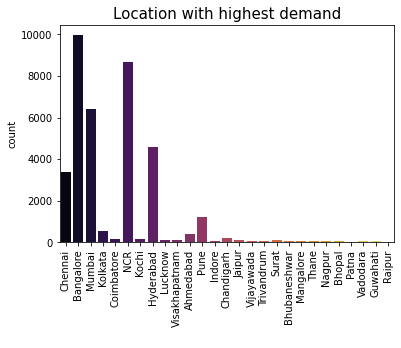

In [11]:
# Counting the data and displaying the addresses which has occured more than 25 times

count = df['joblocation_address'].value_counts()
df = df.loc[df['joblocation_address'].isin(count.index[count > 25])]
display(df['joblocation_address'].value_counts())

# Graph for visualization

sns.countplot(df['joblocation_address'], palette = 'inferno')
plt.title('Location with highest demand', fontsize = 15)
plt.xlabel(' ')
plt.xticks(rotation = 90)
plt.show()

In [12]:
# Checking 'experience' column

df['experience'][:5]

0      0 - 1 yrs
1      0 - 0 yrs
2      4 - 8 yrs
3    11 - 15 yrs
3    11 - 15 yrs
Name: experience, dtype: object

In [13]:
# Splitting the minimum and maximum experience on the basis of ' ' to get a clear data

df['experience'] = df['experience'].str.split(' ')
df['Minimum_experience'] = df['experience'].apply(lambda x: x[0])
df['Maximum_experience'] = df['experience'].apply(lambda x: x[2] if len(x) > 2 else x[1])

In [14]:
df['Minimum_experience'].value_counts()

2      7301
0      6340
3      5343
1      4490
5      3329
4      3135
6      1530
10     1430
8      1292
7      1048
9       486
12      315
15      285
Not     111
11       75
13       74
14       63
20       26
18       25
16       16
17        6
26        1
23        1
25        1
Name: Minimum_experience, dtype: int64

In [15]:
df['Maximum_experience'].value_counts()

5            6458
7            4494
8            3740
6            3303
3            3233
10           2860
4            2664
9            1815
2            1597
12           1085
1            1064
11           1059
15            834
13            682
20            501
0             358
14            251
18            134
Mentioned     111
16            109
17             94
25             85
22             85
19             27
23             26
24             20
21             12
30             11
28              8
26              1
27              1
-1              1
Name: Maximum_experience, dtype: int64

In [16]:
# Replacing 'Not' in Minimum_experience with 0 and 'Mentioned' and '-1' in Maximum_expericence with 5

df['Minimum_experience'] = df['Minimum_experience'].replace('Not', 0)
df['Maximum_experience'] = df['Maximum_experience'].replace(('Mentioned', '-1'), (5, 5))

# Converting the data type to int

df['Minimum_experience'] = df['Minimum_experience'].astype('int')
df['Maximum_experience'] = df['Maximum_experience'].astype('int')

In [17]:
df['Minimum_experience'].value_counts()

2     7301
0     6451
3     5343
1     4490
5     3329
4     3135
6     1530
10    1430
8     1292
7     1048
9      486
12     315
15     285
11      75
13      74
14      63
20      26
18      25
16      16
17       6
23       1
25       1
26       1
Name: Minimum_experience, dtype: int64

In [19]:
df['Maximum_experience'].value_counts()

5     6570
7     4494
8     3740
6     3303
3     3233
10    2860
4     2664
9     1815
2     1597
12    1085
1     1064
11    1059
15     834
13     682
20     501
0      358
14     251
18     134
16     109
17      94
22      85
25      85
19      27
23      26
24      20
21      12
30      11
28       8
26       1
27       1
Name: Maximum_experience, dtype: int64

c:\users\kiit\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\kiit\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


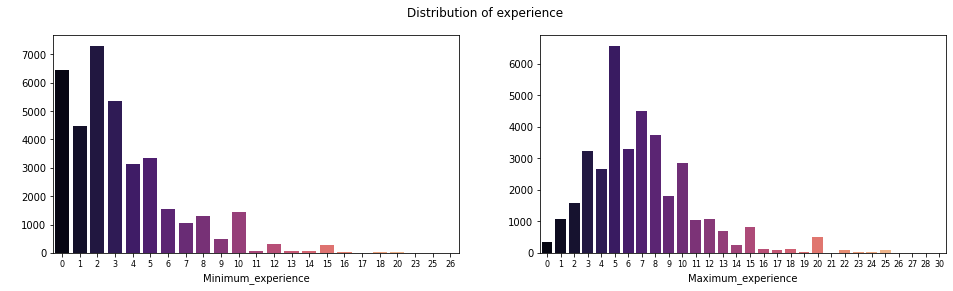

In [23]:
# Plotting graph for distribution of experience

plt.rcParams['figure.figsize'] = (16, 4)

plt.subplot(1, 2, 1)
sns.countplot(df['Minimum_experience'], palette = 'magma')
plt.xticks(fontsize = 8)
plt.ylabel(' ')

plt.subplot(1, 2, 2)
sns.countplot(df['Maximum_experience'], palette = 'magma')
plt.xticks(fontsize = 8)
plt.ylabel(' ')

plt.suptitle('Distribution of experience')
plt.show()

In [24]:
# Checking 'education' column

df['education'][:5]

0    UG: B.Tech/B.E. - Any Specialization PG:Any Po...
1    UG: B.Tech/B.E. - Any Specialization PG:MBA/PG...
2    UG: Any Graduate - Any Specialization PG:Any P...
3    UG: Any Graduate - Any Specialization PG:CA Do...
3    UG: Any Graduate - Any Specialization PG:CA Do...
Name: education, dtype: object

In [25]:
df['education'].describe()

count                                                 33591
unique                                                 2316
top       UG: Any Graduate - Any Specialization, Graduat...
freq                                                   4384
Name: education, dtype: object

In [26]:
# Filling the null value with maximum repeated value

df['education'] = df['education'].fillna('UG: Any Graduate - Any Specialization')
df['education'].isnull().sum()

0

In [27]:
# Splitting the data in 'education' to get a clear picture

df['education'] = df['education'].str.split(' ')
df['education'] = df['education'].apply(lambda x: x[1] if len(x) > 1 else x[0])

df['education'].value_counts(dropna = False)

Any                    24216
B.Tech/B.E.             8835
B.Com                    647
B.Sc                     544
Diploma                  441
Graduation               397
B.B.A                    267
B.A                      240
BCA                      174
MBBS                     155
BDS                      109
B.Pharma                  97
Other                     86
B.Ed                      85
LLB                       71
-                         54
Not                       54
BHM                       54
Doctorate                 49
B.Arch                    37
B.Tech/B.E.,              23
B.Sc,                     21
Postgraduate              14
PG:CA                     10
Doctorate:Doctorate        9
B.Pharma,                  7
Diploma,                   5
B.Com,                     5
BVSC                       3
B.A,                       3
BCA,                       3
B.B.A,                     2
MBA/PGDM                   2
BFA                        1
PG:Other      

In [ ]:
# (lambda x: x[1] if len(x) > 1 else x[0]) --> Take the second index value if the length of string is greater than 1, else take the first value itself

In [28]:
# Replacing the values 

df['education'] = df['education'].replace(('B.Tech/B.E.','Graduation','Other','-','Not','B.Tech/B.E.,','Postgraduate',
                                               'PG:CA','Diploma,','B.Com,','B.Pharma,','B.A,','BCA,','B.Sc,','MBA/PGDM','B.B.A,',
                                              'PG:Other','Doctorate:Doctorate','Post'),
                                              ('B.Tech','B.Tech','B.Tech','B.Tech','B.Tech','B.Tech','B.Tech',
                                              'CA','Diploma','B.Com','B.Pharma','B.A','BCA','B.Sc','MBA','BBA',
                                              'B.Tech','Doctorate','B.Tech'))

df['education'].value_counts()

Any          24216
B.Tech        9464
B.Com          652
B.Sc           565
Diploma        446
B.B.A          267
B.A            243
BCA            177
MBBS           155
BDS            109
B.Pharma       104
B.Ed            85
LLB             71
Doctorate       58
BHM             54
B.Arch          37
CA              10
BVSC             3
MBA              2
BBA              2
BFA              1
BAMS             1
B.Des.           1
Name: education, dtype: int64

In [29]:
# Checking 'industry' column

df['industry'][:5]

0            Media / Entertainment / Internet
1    Advertising / PR / MR / Event Management
2             IT-Software / Software Services
3      Banking / Financial Services / Broking
3      Banking / Financial Services / Broking
Name: industry, dtype: object

In [30]:
# Checking for null values

df['industry'].isnull().sum()

1

In [31]:
# Filling the missing value with mode

df['industry'] = df['industry'].fillna(df['industry'].mode()[0])

In [32]:
df['industry'].isnull().sum()

0

In [33]:
# Splitting the data on the basis of '/' to get a clear picture
# After splitting, we are considering only the first value as the industry category as the other parts are almost similar to it

df['industry'] = df['industry'].str.split('/')
df['industry'] = df['industry'].apply(lambda x: x[0])

df['industry'].value_counts()

IT-Software                 14696
BPO                          2321
Banking                      2113
Education                    1727
Recruitment                  1538
Automobile                   1171
Internet                     1025
Pharma                       1023
Construction                  953
Medical                       874
Travel                        733
Industrial Products           608
Accounting                    548
Other                         548
Strategy                      518
Advertising                   472
IT-Hardware & Networking      443
Telecom                       434
FMCG                          426
Media                         426
Insurance                     400
Retail                        371
Oil and Gas                   347
Real Estate                   306
Consumer Electronics          268
Semiconductors                249
Electricals                   243
Textiles                      194
Courier                       183
KPO           

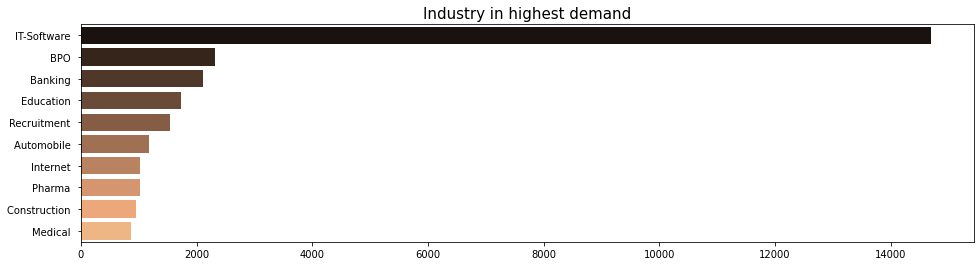

In [39]:
# Plotting graph for the industry

plt.rcParams['figure.figsize'] = (16, 4)
plt.title('Industry in highest demand', fontsize = 15)
sns.barplot(y = df['industry'].value_counts().head(10).index,
            x = df['industry'].value_counts().head(10).values,
            palette = 'copper')
plt.show()

In [41]:
# Checking 'skills' column

df['skills'][:10]

0                                     ITES
1                                Marketing
2    IT Software - Application Programming
3                                 Accounts
3                                 Accounts
3                                 Accounts
3                                 Accounts
3                                 Accounts
4    IT Software - Application Programming
5    IT Software - Application Programming
Name: skills, dtype: object

In [42]:
df['skills'].isnull().sum()

805

In [43]:
# Filling the missing values with mode

df['skills'] = df['skills'].fillna(df['skills'].mode()[0])
df['skills'].isnull().sum()

0

In [44]:
# Splitting the data on the basis of '-'

df['skills'] = df['skills'].str.split('-')
df['skills'] = df['skills'].apply(lambda x: x[1] if len(x) > 1 else x[0])
df['skills'].value_counts()

 Application Programming             9985
Sales                                5933
ITES                                 2953
Production                           1587
Accounts                             1539
HR                                   1455
Teaching                             1351
Marketing                            1328
Medical                               818
Financial Services                    751
Site Engineering                      672
 Other                                634
Engineering Design                    624
 ERP                                  564
 eCommerce                            530
 Network Administration               507
 QA & Testing                         479
IT Hardware                           466
Journalism                            427
 DBA                                  424
Supply Chain                          379
 Embedded                             368
Design                                343
Hotels                            

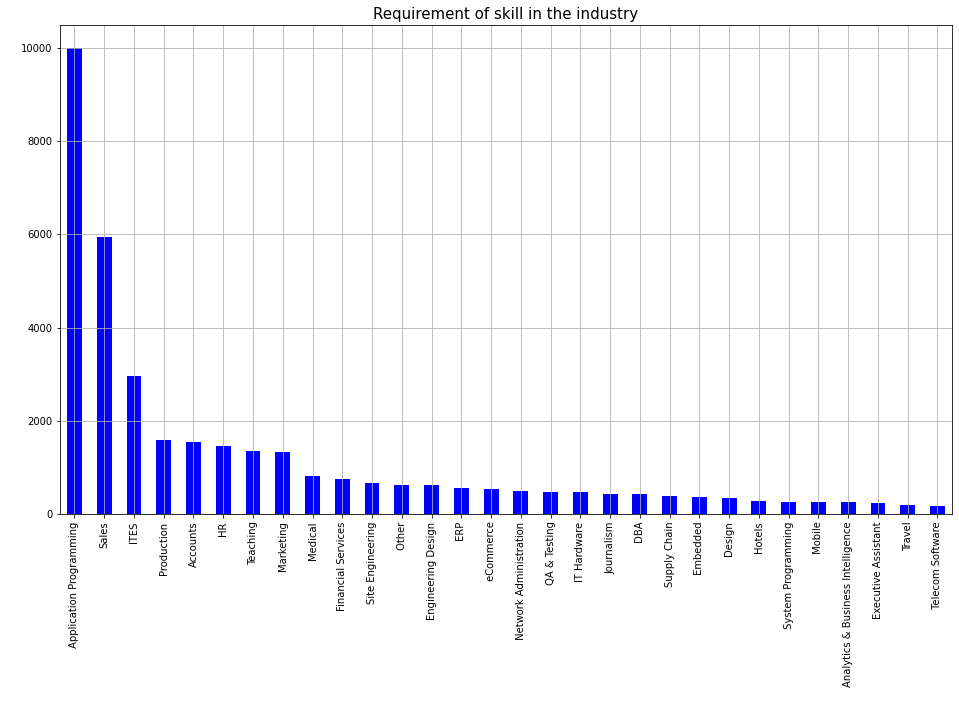

In [54]:
# Plotting graph for skills

plt.rcParams['figure.figsize'] = (16, 9)
plt.title('Requirement of skill in the industry', fontsize = 15)
df['skills'].value_counts().head(30).plot(kind = 'bar', color = 'blue')
plt.grid()
plt.yticks(fontsize = 10)
plt.xlabel(' ')
plt.ylabel(' ')
plt.show()

In [56]:
# Checking for null values

df.isnull().sum()

company                    0
education                  0
experience                 0
industry                   0
jobdescription             0
jobid                      0
joblocation_address        0
jobtitle                   0
numberofpositions      27829
payrate                   93
postdate                  29
site_name              31217
skills                     0
uniq_id                    0
Minimum_experience         0
Maximum_experience         0
dtype: int64

In [57]:
# Filling the null values

df['numberofpositions'] = df['numberofpositions'].fillna(1)
df['numberofpositions'] = df['numberofpositions'].astype('int')

# Dropping the remaining null values

df = df.dropna()

In [58]:
df.isnull().sum()

company                0
education              0
experience             0
industry               0
jobdescription         0
jobid                  0
joblocation_address    0
jobtitle               0
numberofpositions      0
payrate                0
postdate               0
site_name              0
skills                 0
uniq_id                0
Minimum_experience     0
Maximum_experience     0
dtype: int64

In [59]:
df.isnull().sum().sum()

0